In [4]:
import torch, torchvision
from torch import nn,optim
from torch.autograd import Variable as Var 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch, torchvision
from torch import nn,optim
from torch.autograd import Variable as var
import torch.nn.functional as F
from torchvision import datasets, transforms
import torch.utils.data as data_utils
from sklearn.datasets import make_moons
from pandas import DataFrame

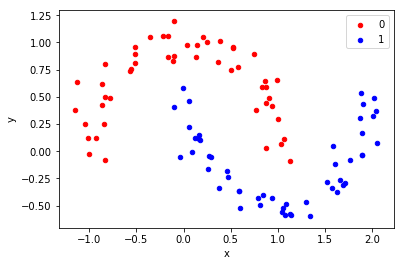

In [5]:
X,y = make_moons(n_samples=100, noise=0.1)
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [6]:
def plot_decision_boundary(pred_func):
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [27]:
df.head()

,x,y,label
0,1.871850,0.038276,1
1,-0.792371,0.606460,0
2,-0.943901,0.046170,0
3,1.954261,-0.053469,1
4,1.463387,-0.505438,1


In [102]:
num_examples = len(X) 
input_dim = 2
output_dim = 2 


epsilon = 0.01 
reg_lambda = 0.01 

In [33]:
def calculate_loss(model):
    Weight1, bias1, Weight2, bias2 = model['Weight1'], model['bias1'], model['Weight2'], model['bias2']
    
    z1 = train.dot(Weight1) + bias1
    a1 = np.tanh(z1)
    z2 = a1.dot(Weight2) + bias2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    
    data_loss += reg_lambda/2 * (np.sum(np.square(Weight1)) + np.sum(np.square(Weight2)))
    return 1./num_examples * data_loss

In [151]:
def predict(model, x):
    Weight1, bias1, Weight2, bias2 = model['Weight1'], model['bias1'], model['Weight2'], model['bias2']
    
    z1 = x.dot(Weight1) + bias1
    a1 = np.tanh(z1)
    z2 = a1.dot(Weight2) + bias2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [118]:
def build_model(hidden_layer, num_passes=300, print_loss=False):
    
    
    np.random.seed(0)
    Weight1 = np.random.randn(input_dim, hidden_layer) / np.sqrt(input_dim)
    bias1 = np.zeros((1, hidden_layer))
    Weight2 = np.random.randn(hidden_layer, output_dim) / np.sqrt(hidden_layer)
    bias2 = np.zeros((1, output_dim))  
    model = {}
    for i in range(0, num_passes):

        for j in range(len(X)):
            idx = np.random.choice(np.arange(len(X)), 5)
            X_sample = X[idx]
            y_sample = y[idx] 
            z1 = X_sample.dot(Weight1) + bias1
            a1 = np.tanh(z1)
            z2 = a1.dot(Weight2) + bias2
            exp_scores = np.exp(z2)
            
            probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
            

            delta3 = probs
            delta3[range(len(X_sample)), y_sample] -= 1
            dW2 = (a1.T).dot(delta3)
            db2 = np.sum(delta3, axis=0, keepdims=True)
            delta2 = delta3.dot(Weight2.T) * (1 - np.power(a1, 2))
            dW1 = np.dot(X_sample.T, delta2)
            db1 = np.sum(delta2, axis=0)


            dW2 += reg_lambda * Weight2
            dW1 += reg_lambda * Weight1


            Weight1 += -epsilon * dW1
            bias1 += -epsilon * db1
            Weight2 += -epsilon * dW2
            bias2 += -epsilon * db2


            model = { 'Weight1': Weight1, 'bias1': bias1, 'Weight2': Weight2, 'bias2': bias2}

        
        if print_loss and i % 30 == 0:
            print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model

Loss after iteration 0: 0.386333
Loss after iteration 30: 0.085024
Loss after iteration 60: 0.040721
Loss after iteration 90: 0.035234
Loss after iteration 120: 0.033776
Loss after iteration 150: 0.033088
Loss after iteration 180: 0.033108
Loss after iteration 210: 0.032782
Loss after iteration 240: 0.033605
Loss after iteration 270: 0.033001


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

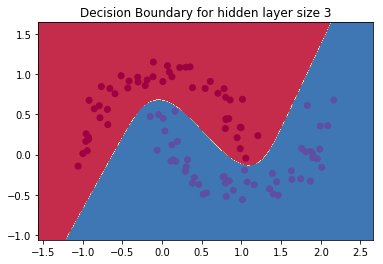

In [160]:
model = build_model(4, print_loss=True)


plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 4")

In [159]:
ff = [lambda x: predict(model, x)]
for i in ff:
    print(i)

<function <lambda> at 0x0000018FE51A5510>


In [ ]:
from sklearn.model_selection import train_test_split
def split(Xdata,Ydata):
    x_train, x_test, y_train, y_test = train_test_split(Xdata,Ydata, test_size=0.2,random_state=0)
    return x_train,y_train,x_test,y_test

In [ ]:
x_train1,y_train1,x_test1,y_test1 = split(X,y)

In [134]:
head = data_utils.TensorDataset(torch.tensor(X), torch.tensor(y))
train_loader = data_utils.DataLoader(head, batch_size=10, shuffle=False)
train_loader1 = data_utils.DataLoader(head, batch_size=1000, shuffle=False)

In [270]:
class NN_Model(nn.Module):
    def __init__(self):
        
        super(NN_Model, self).__init__()
        
        
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4,4)
        self.fc3 = nn.Linear(4,2)
        
    def forward(self,x):
        
        #print(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x))
        
        return x

In [271]:

model = NN_Model()

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [272]:
def train(epoch):
    model1 = model.double()
    model1.train()
    for batch_idx, (X,Y) in enumerate(train_loader): 
        X, Y = Var(X), Var(Y)
        optimizer.zero_grad()
        output = model1(X)
        Y = Y.squeeze()
        loss = F.nll_loss(output, Y)
        loss.backward()
        optimizer.step()
    if epoch % 200 == 0:
        print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(X), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), loss.item()))

In [273]:
def score(x):
    model1 = model.double()
    model1.eval()
    x = torch.tensor(x)
    
    output = model(x)
    pred = output.data.max(1, keepdim=True)[1]
    #pred = np.round(pred)
    
    return pred

In [274]:
def prediction(eopch):
    model1 = model.double()
    model1.eval()
    test_loss = 0
    correct = 0
    for batch_idx, (X,Y) in enumerate(train_loader1):

        X,Y = Var(X), Var(Y)
        output = model1(X)
        Y = Y.squeeze()
        test_loss += F.nll_loss(output, Y, size_average=False).data
        
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(Y.data.view_as(pred)).cpu().sum()

    test_loss /= len(train_loader1.dataset)
    
    print('\nTest set: Average loss: {:.4f}, Test_Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(train_loader1.dataset),
        100. * correct / len(train_loader1.dataset)))
    return pred
    

In [275]:
for epoch in range(2000):
    train(epoch)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [90/100 (90%)]	Loss: -0.513169
Train Epoch: 200 [90/100 (90%)]	Loss: -0.772475
Train Epoch: 400 [90/100 (90%)]	Loss: -0.828589
Train Epoch: 600 [90/100 (90%)]	Loss: -0.830256
Train Epoch: 800 [90/100 (90%)]	Loss: -0.912006
Train Epoch: 1000 [90/100 (90%)]	Loss: -0.933145
Train Epoch: 1200 [90/100 (90%)]	Loss: -0.956909
Train Epoch: 1400 [90/100 (90%)]	Loss: -0.977499
Train Epoch: 1600 [90/100 (90%)]	Loss: -0.987389
Train Epoch: 1800 [90/100 (90%)]	Loss: -0.991354


In [276]:
pred = prediction(1)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()



Test set: Average loss: -0.9949, Test_Accuracy: 100/100 (100%)



C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

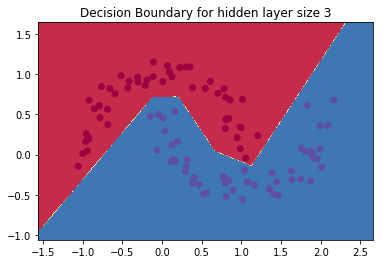

In [277]:
plot_decision_boundary(lambda x: score(x))
plt.title("Decision Boundary for hidden layer size 3")

In [12]:
def score2(x):    
    pred = kmeans.predict(x)
    #pred = np.round(pred)
    
    return pred

In [1]:
from sklearn.cluster import KMeans
import numpy as np

In [7]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

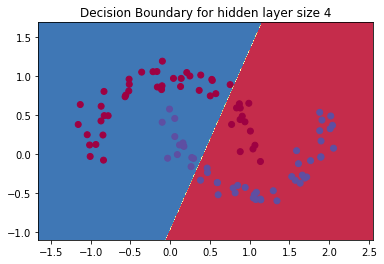

In [13]:
plot_decision_boundary(lambda x: score2(x))
plt.title("Decision Boundary for hidden layer size 4")

In [20]:
def score3(x):    
    pred = gmm.predict(x)
    #pred = np.round(pred)
    
    return pred

In [29]:
from sklearn.mixture import GaussianMixture
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

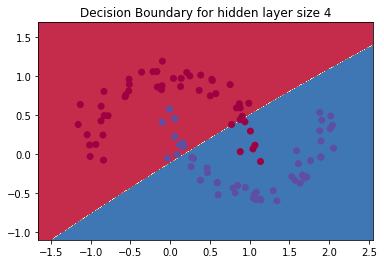

In [30]:
plot_decision_boundary(lambda x: score3(x))
plt.title("Decision Boundary for hidden layer size 4")

In [23]:
def score4(x):    
    pred = clustering.predict(x)
    #pred = np.round(pred)
    
    return pred

In [33]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters = 2, linkage = "single").fit(X)

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

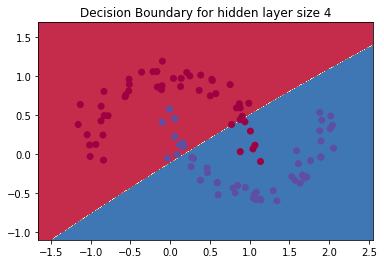

In [34]:
plot_decision_boundary(lambda x: score3(x))
plt.title("Decision Boundary for hidden layer size 4")